In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display
import seaborn as sns
from envs.MazeGridWorld import MazeGridWorld

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


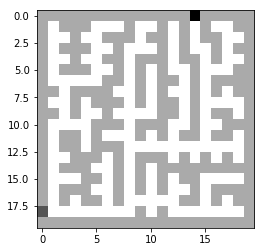

In [2]:
env = MazeGridWorld(grid_size=(20, 20))
s_0 = env.reset()
env.draw_state()

In [3]:
random_policy = lambda state: np.random.randint(4)
V = np.zeros(env.w*env.h).reshape(env.w,env.h)
R = np.zeros(env.w*env.h).reshape(env.w,env.h)
R[env.goal] = 1

In [4]:
def calculate_action_expectation(state, action, Values):
    ps = env.next_states(state, action)
    summation = 0
    for s, p in ps: 
        summation += Values[s] * p
    
    return summation

In [5]:
def calculate_V(V, gamma=0.99, iter_count=100, visual=True):
    for _ in range(iter_count):
        for i in range(V.shape[0])[::-1]:
            for j in range(V.shape[1]):
                if env.field[i, j] != 1:
                    prev = V[i, j]*1
                    V[i, j] = max([R[i, j] + gamma*(calculate_action_expectation((i, j), a, V)) for a in range(4)])
                    if visual and prev != V[i, j]:
                        plt.figure()
                        sns.heatmap(V.T)
                        display.clear_output(wait=True)
                        display.display(plt.gcf())
                        time.sleep(0.000000000000000000000000000000000000000000000000000001)

    return V

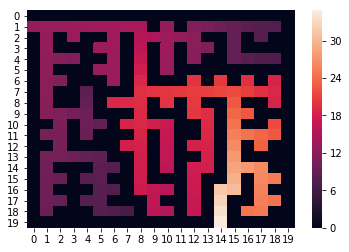

In [ ]:
V = calculate_V(V)

In [ ]:
sns.heatmap(V.T)

In [9]:
def policy(state):
    choices = []
    for action in range(4):
        a = env.next_states(state, action)
        probs = []
        for i in a:
            probs.append(i[1])
        new_state = a[np.argmax(probs)][0]
        choices.append(V[new_state])

    return np.argmax(choices)

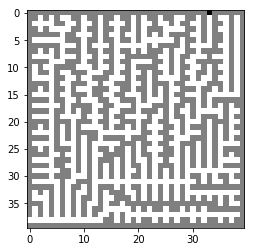

In [10]:
reward1 = env.play_with_policy(policy, max_iter=100)

In [1]:
%matplotlib notebook
from ipywidgets import *
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

dim = widgets.Text(
    value='',
    placeholder='Width, Height',
    description='Maze Dimensions:',
    disabled=False
)

train_button = widgets.Button(
    description='Train',
    disabled=False,
    button_style='warning', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Train'
)

solve_button = widgets.Button(
    description='Solve',
    disabled=True,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Solve'
)

display(dim, train_button, solve_button);

Text(value='', description='Maze Dimensions:', placeholder='Width, Height')

Button(button_style='warning', description='Train', style=ButtonStyle(), tooltip='Train')

Button(button_style='info', description='Solve', disabled=True, style=ButtonStyle(), tooltip='Solve')

In [11]:
%matplotlib notebook
from ipywidgets import *
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

@interact(x=widgets.IntSlider(min=4,max=60,step=1,value=30), y=widgets.IntSlider(min=4,max=60,step=1,value=30))
def CreateMaze(x, y):
    env = MazeGridWorld(grid_size=(x, y))
    s_0 = env.reset()
    print (s_0)
    env.draw_state()
    
train_button = widgets.Button(
    description='Train',
    disabled=False,
    button_style='warning', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Train'
)

solve_button = widgets.Button(
    description='Solve',
    disabled=True,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Solve'
)

display(train_button, solve_button);

interactive(children=(IntSlider(value=30, description='x', max=60, min=4), IntSlider(value=30, description='y'…

Button(button_style='warning', description='Train', style=ButtonStyle(), tooltip='Train')

Button(button_style='info', description='Solve', disabled=True, style=ButtonStyle(), tooltip='Solve')